In [1]:
import os
import torch
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from utils.vae import VAE
from utils.dataset import ShapeImageDataset

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

path = "data/shapes.csv"   
image_dir = "data/images"  
dataset = ShapeImageDataset(df_path=path, image_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=80, shuffle=True)
model = VAE(latent_dim=2).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)  

transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor()
])

def plotLoss(recon_x, x, mu, logvar):

    recon_x = recon_x.view(recon_x.size(0), -1)
    x = x.view(x.size(0), -1)

    BCE = torch.nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')

    KL = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return BCE + KL

Epoch [1/50], Batch [1/1], Loss: 1653883.2500
Epoch [1/50], Mean Loss: 1653883.2500
Epoch [2/50], Batch [1/1], Loss: 1633442.2500
Epoch [2/50], Mean Loss: 1633442.2500
Epoch [3/50], Batch [1/1], Loss: 1545927.6250
Epoch [3/50], Mean Loss: 1545927.6250
Epoch [4/50], Batch [1/1], Loss: 1631748.3750
Epoch [4/50], Mean Loss: 1631748.3750
Epoch [5/50], Batch [1/1], Loss: 1599638.5000
Epoch [5/50], Mean Loss: 1599638.5000
Epoch [6/50], Batch [1/1], Loss: 1555717.3750
Epoch [6/50], Mean Loss: 1555717.3750
Epoch [7/50], Batch [1/1], Loss: 1508677.8750
Epoch [7/50], Mean Loss: 1508677.8750
Epoch [8/50], Batch [1/1], Loss: 1561987.5000
Epoch [8/50], Mean Loss: 1561987.5000
Epoch [9/50], Batch [1/1], Loss: 1489227.3750
Epoch [9/50], Mean Loss: 1489227.3750
Epoch [10/50], Batch [1/1], Loss: 1496755.1250
Epoch [10/50], Mean Loss: 1496755.1250
Epoch [11/50], Batch [1/1], Loss: 1512693.8750
Epoch [11/50], Mean Loss: 1512693.8750
Epoch [12/50], Batch [1/1], Loss: 1503472.1250
Epoch [12/50], Mean Loss:

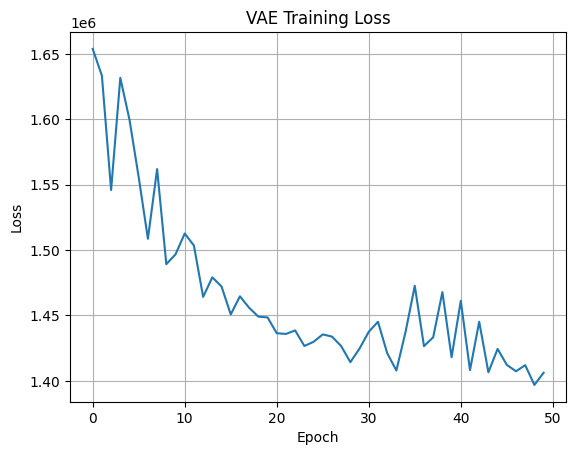

In [ ]:
def plotLoss(recon_x, x, mu, logvar):

    BCE = F.binary_cross_entropy(recon_x.view(-1, 200*200*3), x.view(-1, 200*200*3), reduction='sum')
    

    KL = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KL

losses = []

def trainVae(n_epochs=4096):
    model.train()  
    for epoch in range(n_epochs):
        epoch_loss = 0.0
        for idx, data in enumerate(dataloader):
            data = data.to(device)
            optimizer.zero_grad()

            output, mean, logvar = model(data)

            loss = plotLoss(output, data, mean, logvar)
            loss.backward()

            optimizer.step()

            epoch_loss += loss.item()

            if idx % 100 == 0:
                print(f"Epoch [{epoch+1}/{n_epochs}], Batch [{idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}")

        mean_loss = epoch_loss / len(dataloader)
        losses.append(mean_loss)

        print(f"Epoch [{epoch+1}/{n_epochs}], Mean Loss: {mean_loss:.4f}")

    plotLossCurve(losses)

def plotLossCurve(losses):
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('VAE Training Loss')
    plt.grid(True)
    plt.show()

trainVae(n_epochs=50)

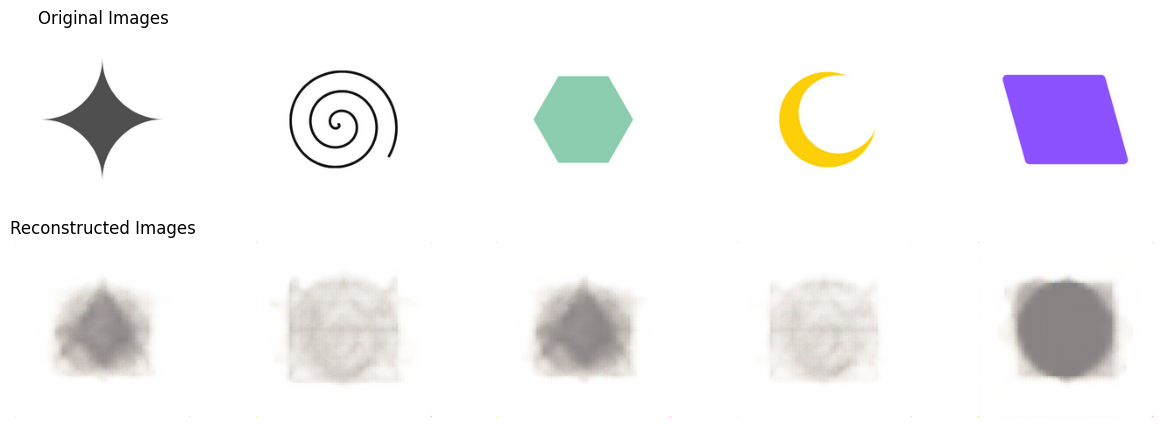

In [21]:
def visualizeSample(model, n_samples=5):
    model.eval()  
    loader = iter(dataloader)
    images = next(loader)  

    with torch.no_grad():
        output_images, _, _ = model(images.to(device))

    images = images.cpu().numpy()
    output_images = output_images.cpu().numpy()

    fig, subplots = plt.subplots(nrows=2, ncols=n_samples, figsize=(15, 5))

    for i in range(n_samples):
        subplots[0, i].imshow(images[i].transpose(1, 2, 0))
        subplots[0, i].axis('off')
        subplots[1, i].imshow(output_images[i].transpose(1, 2, 0))
        subplots[1, i].axis('off')

    subplots[0, 0].set_title('Original Images')
    subplots[1, 0].set_title('Reconstructed Images')
    plt.show()

visualizeSample(model)